In [1]:
%matplotlib inline

In [2]:
import numpy as np
import scipy as sp
import pandas as pd
import seaborn as sns
import datetime
import matplotlib.pyplot as plt

from sgmbasketball.models.factor_model.raw_data import NaturalHandicapRawData
from sgmbasketball.models.factor_model.play_by_play_data import PlayByPlayCleanData
from stratagemdataprocessing.data_api import find_basketball_events

from sgmresearchbase.coint.space import normalise
from sgmresearchbase.coint.common import hurst_naive
from sgmresearchbase.coint.services import CointegrationService, _zs
from sgmresearchbase.coint.projection import interpolate

from IPython.display import clear_output

In [3]:
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (16, 8)

In [4]:
START_DT = datetime.datetime(2015, 6, 1)
END_DT = datetime.datetime(2017, 11, 1)

ALL_EVENTS = find_basketball_events(START_DT, END_DT, True)
NBA_EVENTS = filter(lambda e: e['stage_name'] == 'NBA', ALL_EVENTS)

PBP = PlayByPlayCleanData(str(START_DT)[0:10], str(END_DT)[0:10], 'NBA', 'pbp', fixture_filter=None).get_data_ready()
NH = NaturalHandicapRawData(str(START_DT)[0:10], str(END_DT)[0:10], 'NBA', '', fixture_filter=None, use_cache=False).get_data_ready().dropna()

clear_output()

In [5]:
def get_basis(vals, model=1):
    if vals.shape[0] < 1:
        return np.zeros((2,))

    both_bases = CointegrationService.get_cointegrating_bases(vals, model=model)
    if both_bases is None:
        return np.zeros((2,))

    if both_bases[0, 0]*both_bases[1, 0] < 0:
        basis = both_bases[:, 0]
    elif both_bases[0, 1]*both_bases[1, 1] < 0:
        basis = both_bases[:, 1]
    else:
        basis = both_bases[:, 0]*0.0    

    if basis[0] < 0:
        basis = -basis

    return basis

In [6]:
eids = np.intersect1d(np.unique(PBP.index.get_level_values(0)), np.unique(NH.index.values))
sample = np.array([get_basis(PBP.loc[eid][['points_h', 'points_a']].values) for eid in eids])
groups = pd.cut(NH.ftps_1_line, 6)

In [7]:
data = PBP.loc[2352845, ['points_h', 'points_a']].values
bases = np.array([get_basis(data[(i-100):i, :]) for i in range(100, data.shape[0])])
x = bases[:, 0]

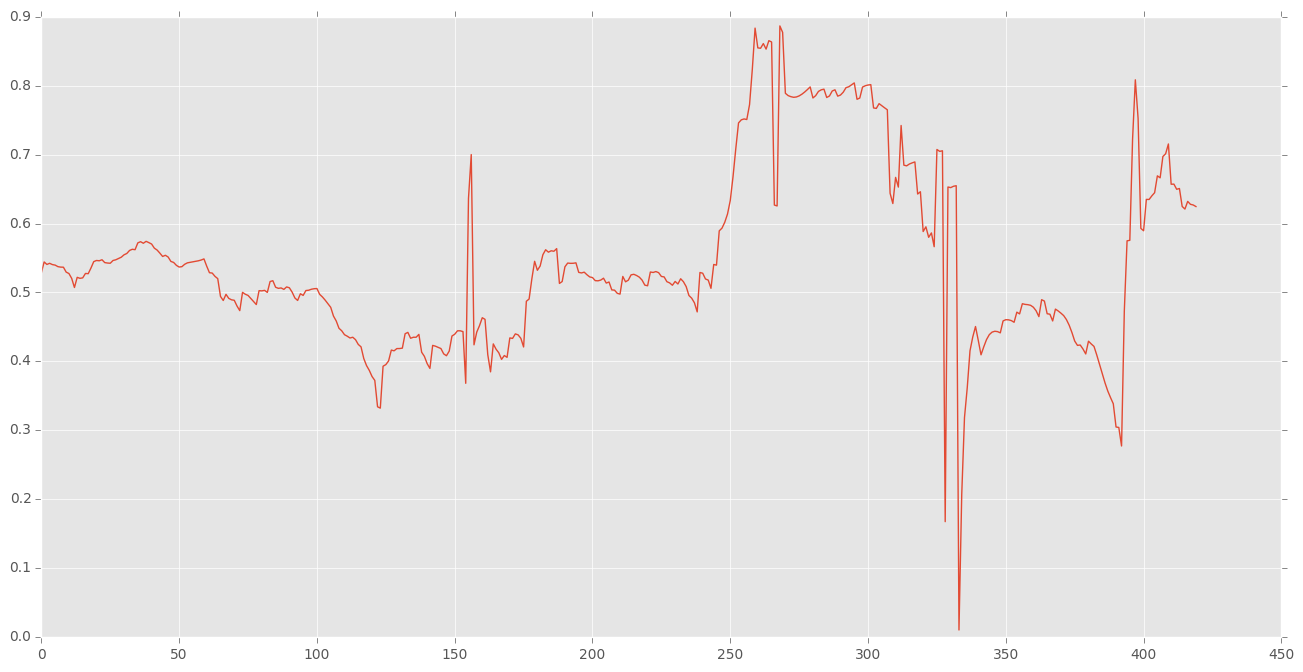

In [8]:
plt.plot(bases[:, 0])

In [9]:
mu = np.zeros(x.shape[0])
kappa = np.zeros(x.shape[0])
alpha = np.zeros(x.shape[0])
beta = np.zeros(x.shape[0])

In [10]:
mu0 = 0.46
kappa0 = 0.2
alpha0 = 1.5
beta0 = 0.2

In [ ]:
for i in range(x.shape[0]):
    mu[0] = kappa[0]
    var[0] = (0.01*0.04)/(0.01+0.04)
